In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import sklearn

### Load the data

In [31]:
df = pd.read_csv("../dbs/raw/db.csv")
df

,CustomerID,DateOfPurchase,ProductCategory,TransactionAmount,Next30DaysPurchase
0,708239,11/30/2021,Groceries,414.04,0
1,488909,07/25/2021,Electronics,287.61,1
2,417618,11/05/2021,Books,133.82,1
3,181531,12/26/2021,Books,118.05,0
4,726861,09/08/2021,Groceries,494.47,1
...,...,...,...,...,...
995,699848,09/08/2022,Home Decor,152.58,1
996,832318,11/04/2021,Books,481.99,1
997,498311,02/13/2022,Books,58.70,0
998,781309,11/20/2021,Books,141.05,1


### understand each column better

In [32]:
df.columns

Index(['CustomerID', 'DateOfPurchase', 'ProductCategory', 'TransactionAmount',
       'Next30DaysPurchase'],
      dtype='object')

#### customer id

In [33]:
print(f"Number of unique id is {df.CustomerID.nunique()}")
print(f"each id is repeated {df.CustomerID.value_counts().unique()}") # this means its useless

Number of unique id is 1000
each id is repeated [1]


#### date

2020-01-02 00:00:00 to 2023-08-05 00:00:00
1311 days
each day can have [5 4 3 2 1] number of transactions


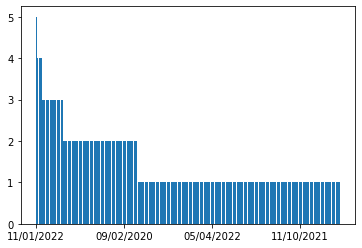

In [34]:
d_min = pd.to_datetime(df.DateOfPurchase).min()
d_max = pd.to_datetime(df.DateOfPurchase).max()
print(f"{d_min} to {d_max}")
print((d_max - d_min).days, "days")
dist = df.DateOfPurchase.value_counts()
print(f"each day can have {dist.unique()} number of transactions")
plt.bar(dist.index, dist.values)
plt.xticks(np.arange(0, dist.shape[0], step=200))
plt.show() # there is a suspisious trend

#### product category

['Groceries' 'Electronics' 'Books' 'Clothing' 'Home Decor'] 5


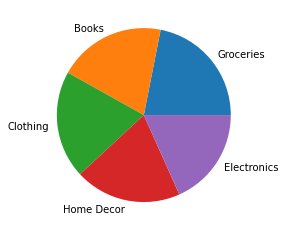

In [35]:
print(df.ProductCategory.unique(), df.ProductCategory.nunique())

tmp = df.ProductCategory.value_counts() / df.shape[0]
plt.pie(tmp.values, labels=tmp.index)
plt.show() # equal divisions is intressting further anaylsis

#### TransactionAmount

count    1000.000000
mean      249.440960
std       136.060825
min        10.100000
25%       131.710000
50%       248.400000
75%       358.690000
max       499.250000
Name: TransactionAmount, dtype: float64


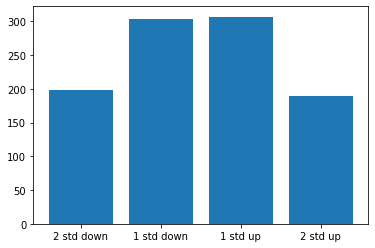

In [36]:
mny = df.TransactionAmount.astype(float)
print(mny.describe())
mu, sigma = mny.mean(), mny.std()
bin_edges = [mu - 2 * sigma, mu - sigma, mu, mu + sigma, mu + 2 * sigma]
bins = pd.cut(mny, bin_edges)
bin_freq = bins.value_counts().sort_index()
plt.bar(
    ["2 std down", "1 std down", "1 std up", "2 std up"],  #make shift candle stick
    bin_freq.values
)
plt.show()

### Crrelation matrix!

In [37]:
df.rename(columns={
                "Next30DaysPurchase": "y",
                "DateOfPurchase": "dt",
                "ProductCategory": "ct",
                "TransactionAmount": "nm",
}, inplace=True)
df.y = df.y.astype(int)
df.dt = pd.to_datetime(df.dt).dt.weekofyear
dict_map = {v: i for i, v in enumerate(df.ct.unique())}
df.ct = df.ct.map(dict_map)
df.nm = df.nm.astype(float)

/var/folders/m2/z849pwcs4p1_h34100yv3bdc0000gn/T/ipykernel_1822/729693167.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.dt = pd.to_datetime(df.dt).dt.weekofyear


In [39]:
df.corr() # there appears to be no correlation between any variables. a great deal of feature engineering is requited

,CustomerID,dt,ct,nm,y
CustomerID,1.000000,-0.023513,-0.009248,0.043622,-0.001586
dt,-0.023513,1.000000,-0.010654,0.013798,-0.002951
ct,-0.009248,-0.010654,1.000000,-0.020099,-0.003178
nm,0.043622,0.013798,-0.020099,1.000000,-0.074588
y,-0.001586,-0.002951,-0.003178,-0.074588,1.000000
